In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_csv("BankNote_Authentication.csv")  

In [36]:
df.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [38]:
X = df.drop(columns=['class']) 
y = df['class']

In [40]:
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [42]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [44]:
k_values =   range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    print(f"K={k}, Accuracy={scores.mean():.4f}")

K=1, Accuracy=0.9993
K=2, Accuracy=1.0000
K=3, Accuracy=1.0000
K=4, Accuracy=1.0000
K=5, Accuracy=1.0000
K=6, Accuracy=1.0000
K=7, Accuracy=1.0000
K=8, Accuracy=1.0000
K=9, Accuracy=1.0000
K=10, Accuracy=1.0000
K=11, Accuracy=1.0000
K=12, Accuracy=1.0000
K=13, Accuracy=1.0000
K=14, Accuracy=1.0000
K=15, Accuracy=1.0000
K=16, Accuracy=1.0000
K=17, Accuracy=0.9971
K=18, Accuracy=0.9971
K=19, Accuracy=0.9956
K=20, Accuracy=0.9956


## How to Choose the Best K?

### From your results:

#### K=2 to K=16 give perfect accuracy (1.0000).
#### K=17 and above start slightly decreasing in accuracy.

# Best K:

## Usually, we choose the smallest K that gives the best accuracy.

### In this case, K=2 to K=16 are all perfect, so you can safely pick K=2 or any value in this range.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,

In [47]:
y_test

430     0
588     0
296     0
184     0
244     0
       ..
843     1
494     0
1032    1
710     0
333     0
Name: class, Length: 412, dtype: int64

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of KNN Model: {accuracy:.4f}')

Accuracy of KNN Model: 1.0000


In [53]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[229   0]
 [  0 183]]


## Here's how to interpret the matrix:

### True Positives (TP): 183 — These are the instances where the model correctly predicted the positive class.
### True Negatives (TN): 229 — These are the instances where the model correctly predicted the negative class.
### False Positives (FP): 0 — These are the instances where the model incorrectly predicted the positive class when it should have been negative.
### False Negatives (FN): 0 — These are the instances where the model incorrectly predicted the negative class when it should have been positive.

### The precision value of 1.0000 means that when your model predicts the positive class (1), it is always correct. In other words, 100% of the positive predictions were true positives, and there were no false positives.

In [57]:
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

Precision: 1.0000


## A recall of 1.0000 means that your model is correctly identifying all the positive instances in the dataset. It’s perfect recall, and the model is not missing any positive class (1) predictions.

In [60]:
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

Recall: 1.0000


### An F1 Score of 1.0000 indicates that your model is perfectly balanced in terms of both precision and recall, showing excellent performance without any compromises. This is a perfect classification model for the dataset, with no false positives or false negatives.

In [63]:
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

F1 Score: 1.0000


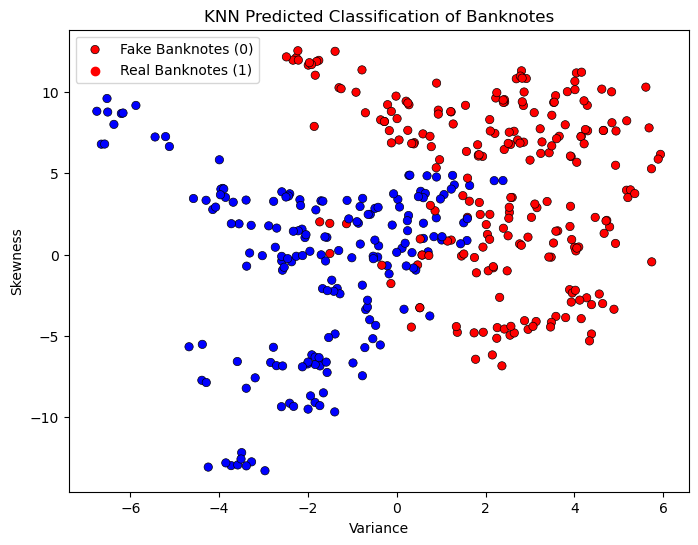

In [70]:
# Visualize the predicted classes with KNN
# Convert X_test to NumPy array if it's a pandas DataFrame
import seaborn as sns
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test
plt.figure(figsize=(8, 6))

# Plot data points, color-coded by prediction (Fake or Real)
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette=["red", "blue"], edgecolor="black")

# Add labels and title to the plot
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.title("KNN Predicted Classification of Banknotes")
plt.legend(["Fake Banknotes (0)", "Real Banknotes (1)"])
plt.show()

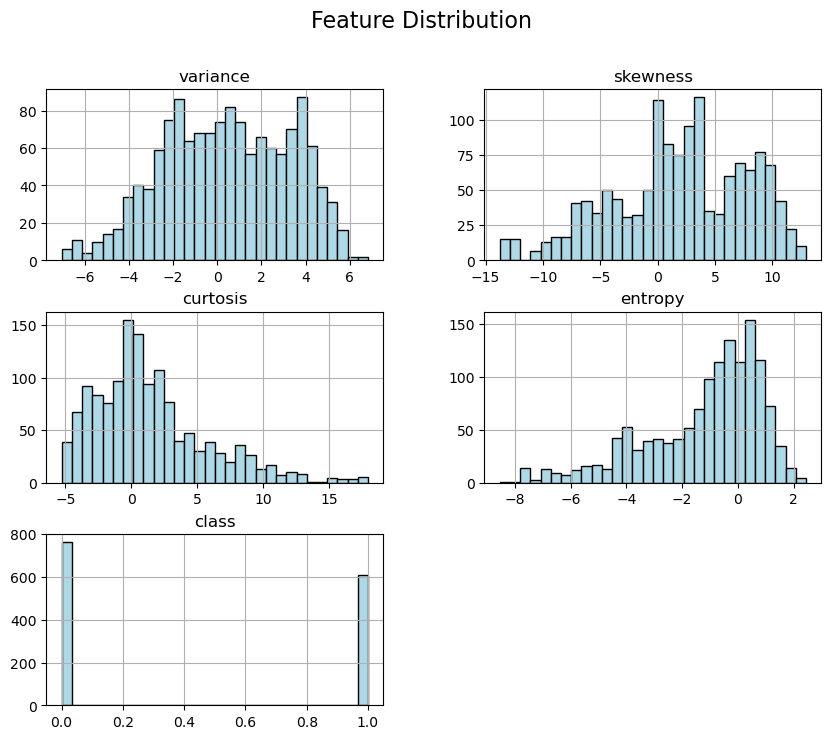

In [72]:
import matplotlib.pyplot as plt
df.hist(figsize=(10, 8), bins=30, color='lightblue', edgecolor='black')
plt.suptitle('Feature Distribution', fontsize=16)
plt.show()

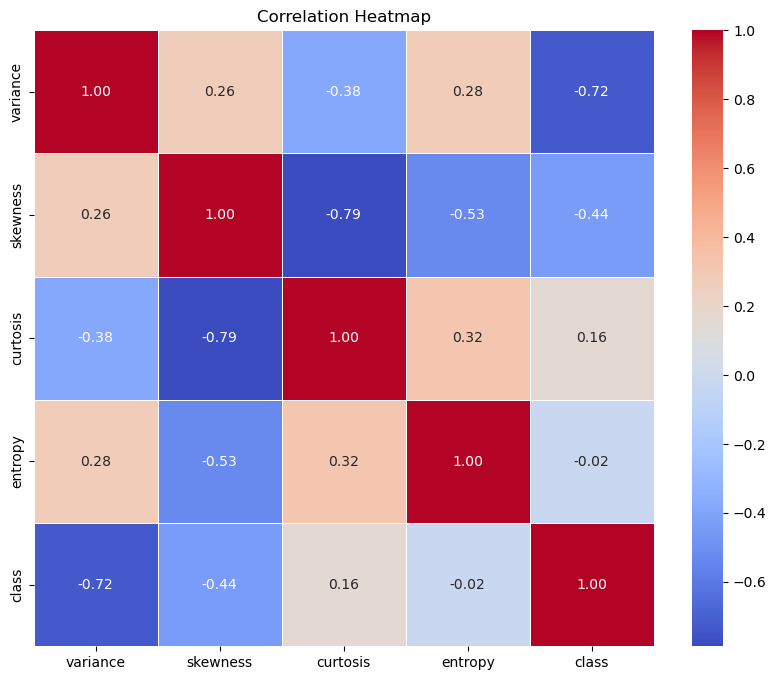

In [74]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

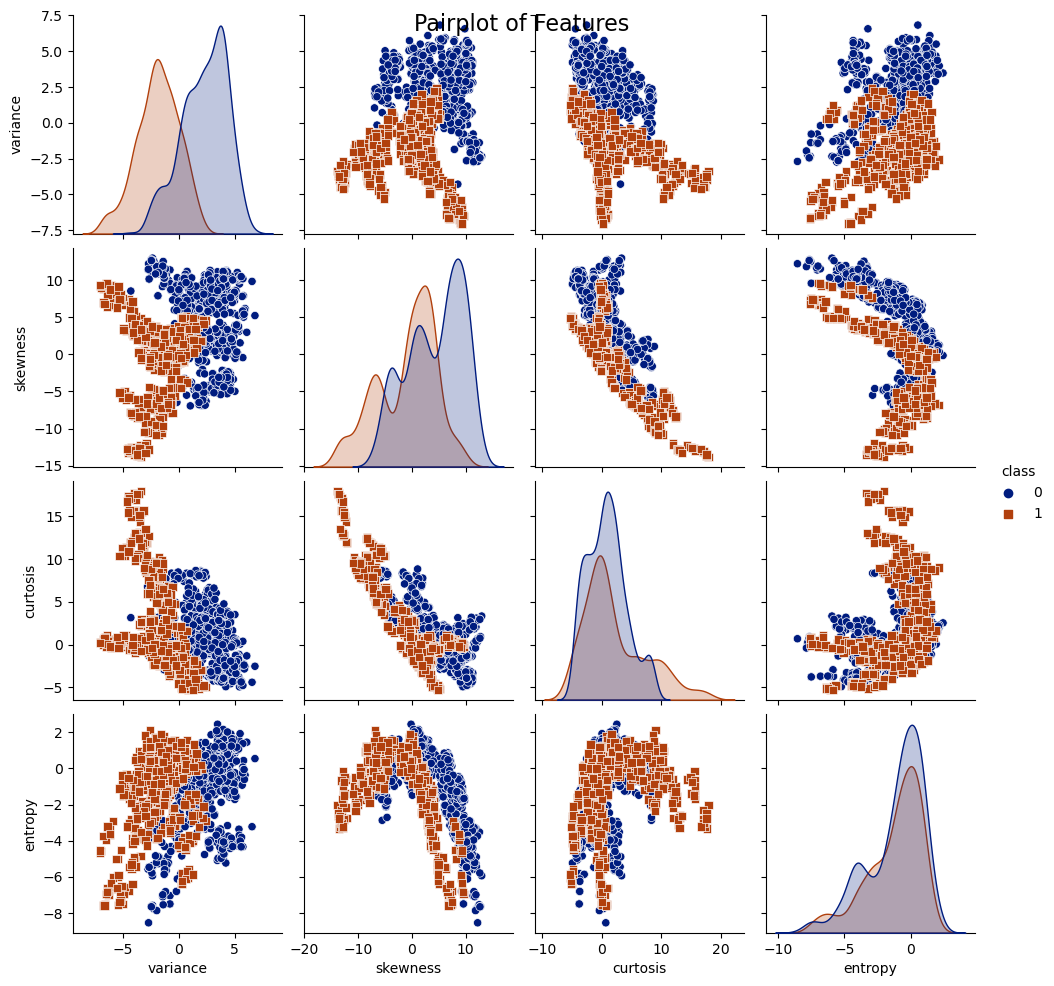

In [76]:
sns.pairplot(df, hue='class', palette='dark', markers=["o", "s"], diag_kind="kde")
plt.suptitle('Pairplot of Features', fontsize=16)
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

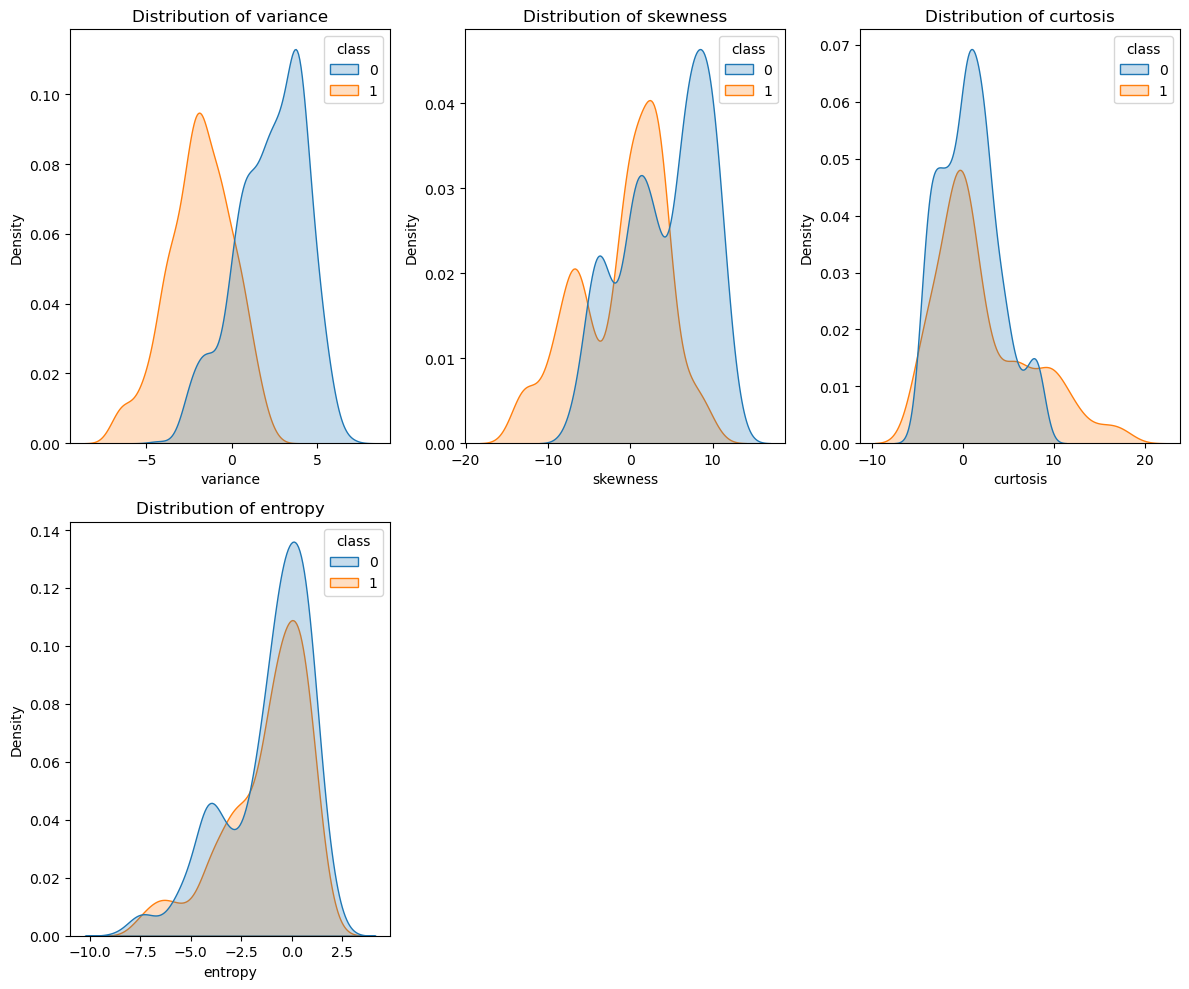

In [78]:
plt.figure(figsize=(12, 10))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(data=df, x=feature, hue='class', fill=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

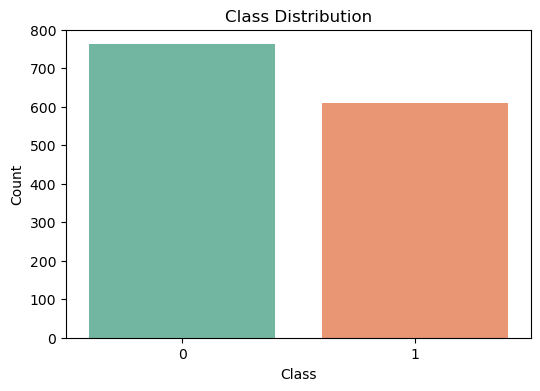

In [80]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

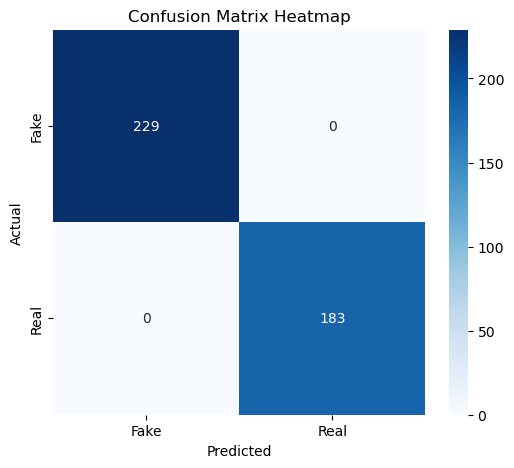

In [82]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [84]:
import numpy as np
# New input values (variance, skewness, curtosis, entropy)
new_input = np.array([[3.570, 9.000, -3.00, -0.42179]])

# Make a prediction using the trained KNN model
prediction = model.predict(new_input)
prediction

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [86]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# Logistic regression

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [91]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9879
Confusion Matrix:
[[226   3]
 [  2 181]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [95]:
# New input values (variance, skewness, curtosis, entropy)
new_input = np.array([[2.5, 4.2, 3.1, 1.3]])

# Make a prediction using the trained Logistic Regression model
prediction = model.predict(new_input)
prediction

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)